In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.constants import c

from tracking import *

In [2]:
path = 'ranging_qo100_20200614_1156.int16'
#path = 'ranging_qo100_20200614_1248.int16'
x = load_file(path)[2*(2*repeat_samples+calibration_RX_delay_samples):]

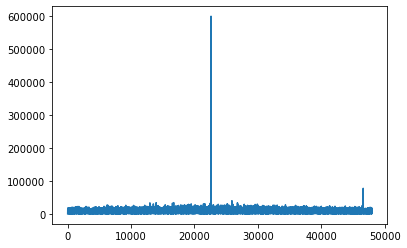

In [3]:
acq = acquire(x)
plt.plot(np.abs(acq['corr']))

In [4]:
# compute code delay from acq
code_delay = -np.argmax(np.abs(acq['corr'])) / acq['corr'].size * 2 * prn.size % prn.size
freq = -acq['doppler'] / prn.size * fs / 2

# short tracking to find secondary code phase
secondary_repeats = 4
tck_test = track(x, code_delay, freq = freq, max_correlations = secondary_repeats * secondary_code.size)

test_symbols = np.average(tck_test['correlations'].real[:secondary_code.size * secondary_repeats].reshape((-1,secondary_code.size)), axis = 0)
sec_corr = [np.sum(test_symbols * np.roll(secondary_code, -j)) for j in range(secondary_code.size)]
secondary_code_phase = np.argmax(np.abs(sec_corr))

tck = track(x, code_delay, freq = freq, secondary_code_phase = secondary_code_phase)

In [5]:
secondary_code_phase

9

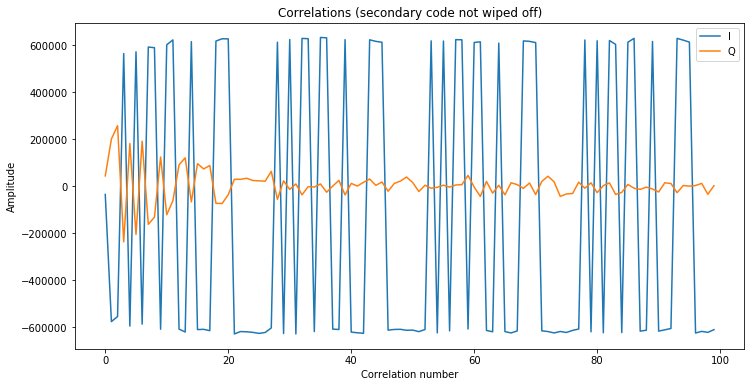

In [6]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(tck_test['correlations'].real)
plt.plot(tck_test['correlations'].imag)
plt.title('Correlations (secondary code not wiped off)')
plt.ylabel('Amplitude')
plt.xlabel('Correlation number')
plt.legend(['I', 'Q'])

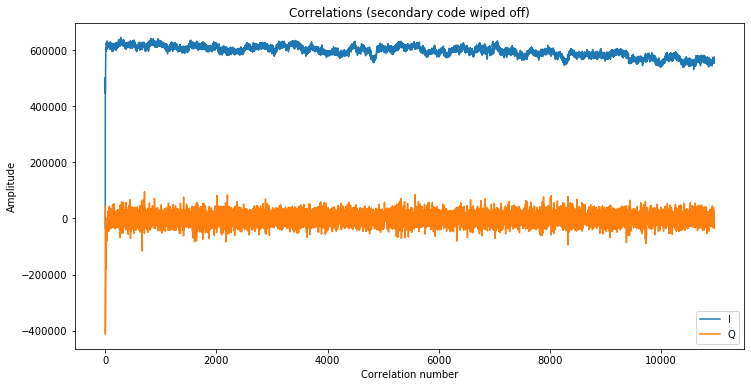

In [7]:
plt.figure(figsize = (12,6), facecolor = 'w')
plt.plot(tck['correlations'].real)
plt.plot(tck['correlations'].imag)
plt.title('Correlations (secondary code wiped off)')
plt.ylabel('Amplitude')
plt.xlabel('Correlation number')
plt.legend(['I', 'Q'])

In [9]:
#np.savez(path.replace('.int16', '.npz'), **tck)